Imports

In [13]:
import numpy as np
import pandas as pd

from matplotlib import pyplot

from sklearn.metrics import accuracy_score, balanced_accuracy_score

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from keras.utils import to_categorical
from keras.optimizers import SGD

Load Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


Visualize Data

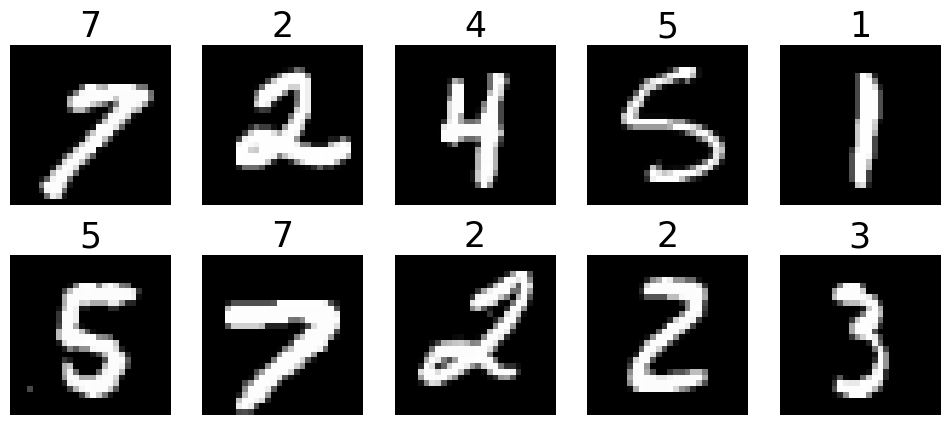

In [4]:
fig , axes  = pyplot.subplots(2, 5, figsize=(12,5))
axes   = axes.flatten()
idx = np.random.randint(0, 42000, size=10)
for i in range(10):
    axes[i].imshow(X_train[idx[i], :].reshape(28,28), cmap='gray')
    axes[i].axis('off') # hide the axes ticks
    axes[i].set_title(str(int(y_train[idx[i]])), color='black', fontsize=25)
pyplot.show()

Prepare Data

In [5]:
# To give us values between 0 and 1, best for the CNN to learn
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

print("X_train: " + str(X_train.shape))
print("X_test: " + str(X_test.shape))

X_train: (60000, 28, 28, 1)
X_test: (10000, 28, 28, 1)


In [6]:
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

Build Model

In [15]:
model = Sequential()  # A FNN, one input, one output

model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(28, 28, 1)))  
model.add(MaxPooling2D())
model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

criterion = SGD(learning_rate=0.01, momentum=0.9)

model.compile(optimizer = criterion, loss='categorical_crossentropy', metrics=['accuracy'])
 

<Sequential name=sequential_7, built=True>


c:\Users\ronan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train Model

In [ ]:
model.train()

Validation